<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=150462647" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 45.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 37.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 3.0 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=3a0e22b76f3e539a3db553b5a3a78d013053634fd0ca12e4f4e7b3eeea0a5f77
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.158882,1.818907,0.119264,1.897110,14.116234,12.507753,14.599841,17.558670,2.298415,0.637008,...,0.139145,4.185068,3.879685,3.966014,3.762824,0.430111,6.332422,0.455730,0.937302,0.000663
2014-11-25,12.044562,1.819135,0.119668,1.901869,14.117357,12.537065,14.638675,17.612189,2.300905,0.638969,...,0.138814,4.219553,3.880207,3.978962,3.763224,0.430407,6.362609,0.456400,0.940718,0.000661
2014-11-26,12.045241,1.818037,0.119896,1.907586,14.105823,12.535153,14.672870,17.642281,2.297976,0.640026,...,0.138700,4.222921,3.877676,3.999723,3.759247,0.430844,6.383881,0.456573,0.942084,0.000660
2014-11-27,12.057180,1.823885,0.119971,1.903088,14.143228,12.472965,14.664869,17.626582,2.303345,0.638699,...,0.139068,4.218837,3.888066,3.987153,3.769216,0.431591,6.411255,0.457784,0.944582,0.000662
2014-11-28,12.073241,1.829153,0.119494,1.908586,14.197549,12.430126,14.700956,17.679930,2.311237,0.640546,...,0.139808,4.241239,3.902999,3.997058,3.783188,0.432457,6.395869,0.458281,0.948463,0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-07,13.897457,2.760711,0.143465,1.972437,21.604867,15.674102,23.980603,23.094885,2.967691,0.939121,...,0.075412,5.211895,5.935403,4.655619,5.762373,0.608245,0.759120,0.666673,0.590781,0.000888
2023-11-08,13.847959,2.765813,0.143059,1.977544,21.639677,15.664872,24.031605,23.144805,2.971915,0.940836,...,0.075542,5.220292,5.944966,4.668050,5.771966,0.609568,0.761095,0.667747,0.591733,0.000888
2023-11-09,13.811144,2.772472,0.143156,1.977576,21.681566,15.683804,24.000614,23.134382,2.977134,0.943183,...,0.075688,5.230397,5.956474,4.657594,5.783602,0.606987,0.762458,0.669040,0.592878,0.000891


# Загрузка истории

In [5]:
!cp -r /kaggle/input/abscur-pred-one-one/*.png .

In [6]:
try:
    with open("/kaggle/input/abscur-pred-one-one/history.pickle", "rb") as file:
        history = pickle.load(file)
except:
    history = []
# history

# Цикл


======================================== CLP ========================================
2023-11-13 02:59:14,263 - Unknown integration target: 
2023-11-13 02:59:23,221 - Unknown integration target: 
2023-11-13 02:59:32,635 - Unknown integration target: 
2023-11-13 02:59:41,485 - Unknown integration target: 
2023-11-13 02:59:50,618 - Unknown integration target: 
2023-11-13 03:00:10,792 - Unknown integration target: 
2023-11-13 03:00:30,795 - Unknown integration target: 
2023-11-13 03:00:51,075 - Unknown integration target: 
2023-11-13 03:00:53,602 - Unknown integration target: 
2023-11-13 03:00:53,607 - Unknown integration target: 
2023-11-13 03:01:06,089 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.8 MiB, max: 265.8 MiB
2023-11-13 03:01:06,106 - ApiComposer - Initial pipeline was fitted in 9.8 sec.
2023-11-13 03:01:06,119 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
20

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-13 03:10:41,156 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [09:34<?, ?gen/s]

2023-11-13 03:10:41,198 - ApiComposer - Hyperparameters tuning started with 0 min. timeout


2023-11-13 03:11:16,956 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [treg, ridge, ridge, glm, data_source_ts/CLP, ridge, lagged, linear, decompose]}
treg - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CLP - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.001
2023-11-13 03:11:16,964 - PipelineTuner - Tuner stopped after initial assumption due to the lack of time
2023-11-13 03:11:16,969 - ApiComposer - Hyperparameters tuning finished
2023-11-13 03:11:17,466 - ApiComposer - Model generation finished
2023-11-13 03:11:51,884 - FEDOT logger - Final pipeline was fitted
2023-11-13 03:11:51,888 - FEDOT logger - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [treg, ridge, ridge, glm, data_source_ts/CLP, ridge, lagged, linear, decompose]}
treg - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CLP - {}
ridge - {}
lagged - {'window_size': 10}
l

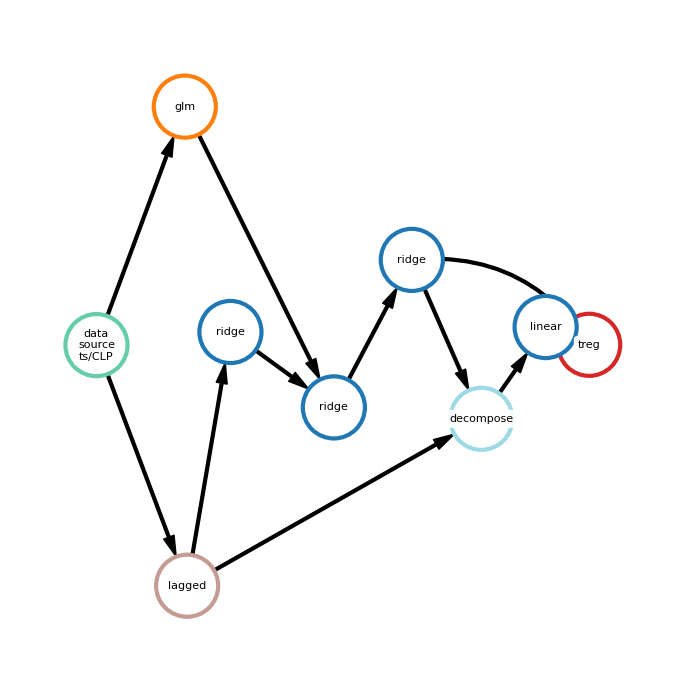

[0.02575962 0.0257583  0.02579403 0.02574836 0.02576051 0.02576404
 0.02575992 0.02576955 0.02575626 0.02574485 0.02575389 0.02574716
 0.02580443 0.02581366 0.02586922 0.0258503  0.02584543 0.02585183
 0.02587987 0.02591782]
{'mae': 0.0, 'mape': 0.006}


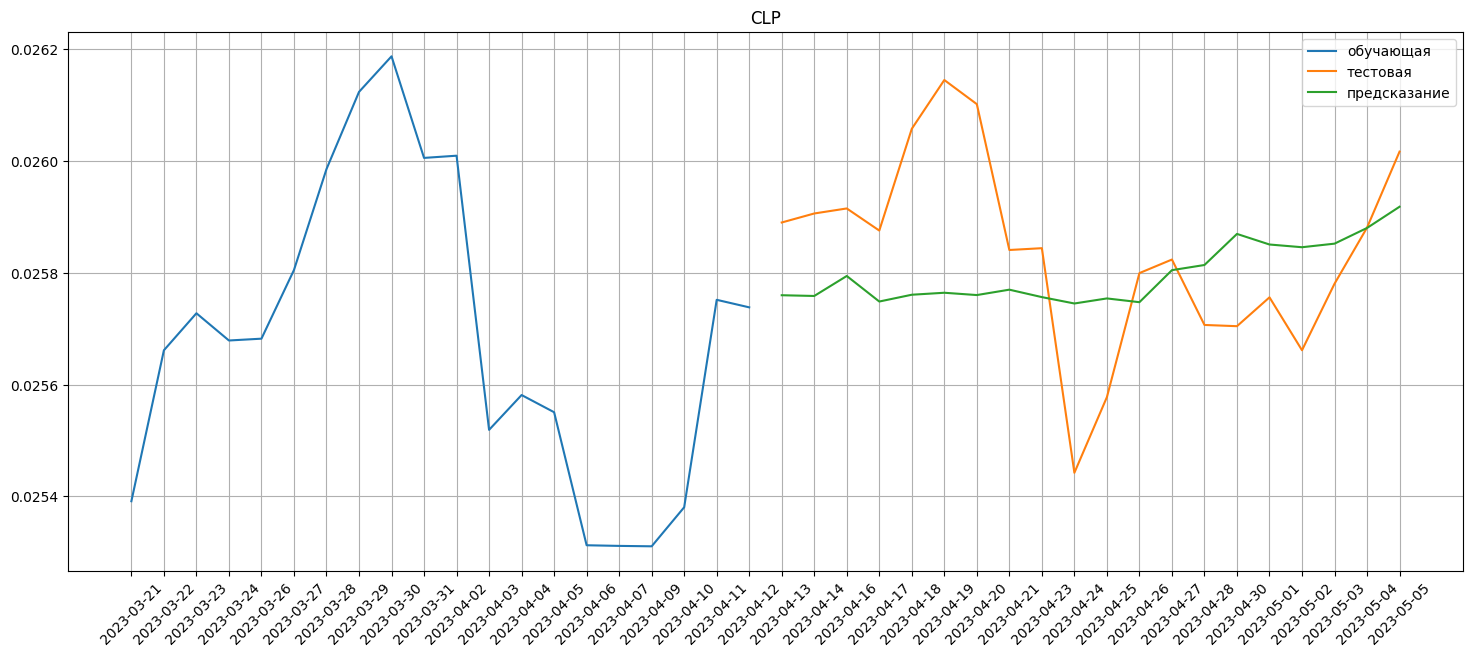


======================================== EUR ========================================
2023-11-13 03:12:10,787 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.6 MiB
2023-11-13 03:12:10,799 - ApiComposer - Initial pipeline was fitted in 12.4 sec.
2023-11-13 03:12:10,809 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-13 03:12:10,846 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 46 min. Set of candidate models: ['polyfit', 'stl_arima', 'smoothing', 'ar', 'glm', 'locf', 'arima', 'clstm', 'ets', 'lagged', 'gaussian_filter', 'sparse_lagged', 'ts_naive_average', 'diff_filter', 'cut', 'polyfit', 'adareg', 'ar', 'pca', 'glm', 'locf', 'normalization', 'ransac_lin_reg', 'exog_ts', 'fast_ica', 'smoothing', 'ridge', 'sparse_lagged', 'linear', 'ts_naive_average', 'lasso', 'cut', 'ransac_non_lin_reg', 'lgbmreg', 'stl_arima', 'arima', 'rfr', 

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-13 03:26:54,613 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [14:43<?, ?gen/s]

2023-11-13 03:26:54,645 - ApiComposer - Hyperparameters tuning started with 31 min. timeout


2023-11-13 03:27:18,273 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [lgbmreg, ridge, glm, data_source_ts/EUR, ridge, lagged]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/EUR - {}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 0.121
  0%|          | 69/100000 [27:32<777:39:13, 28.01s/trial, best loss: 0.11383341844363476]
2023-11-13 03:58:52,451 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [lgbmreg, ridge, glm, data_source_ts/EUR, ridge, lagged]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100, 'reg_alpha': 2.151332993061752e-05, 'reg_lambda': 0.0018870576551266824}
ridge - {'alpha': 4.525432905158688}
glm - {'family': 'gamma', 'link': 'log'}
data_source_ts/EUR - {}
ridge -

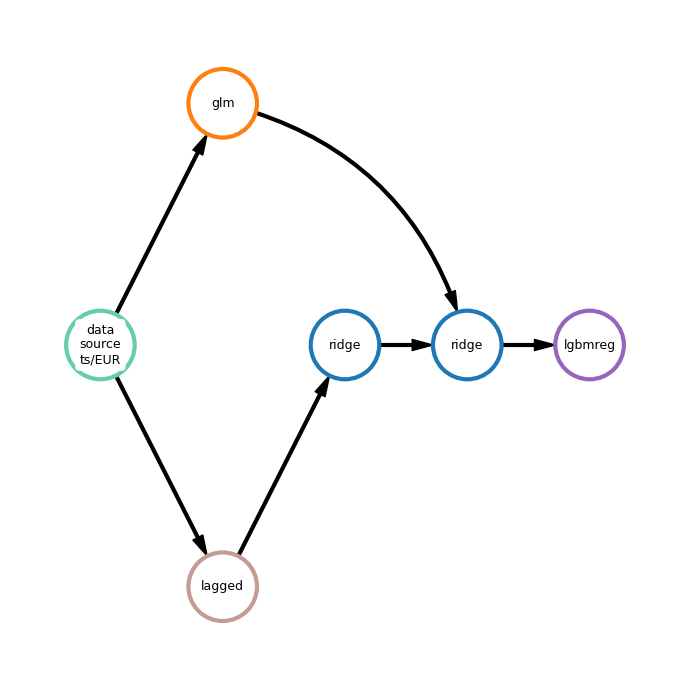

[21.14446046 21.1476586  21.18252025 21.19605648 21.20076767 21.2172341
 21.24578642 21.23129633 21.21655772 21.18869588 21.19349127 21.22395657
 21.2545263 ]
{'mae': 0.045, 'mape': 0.002}


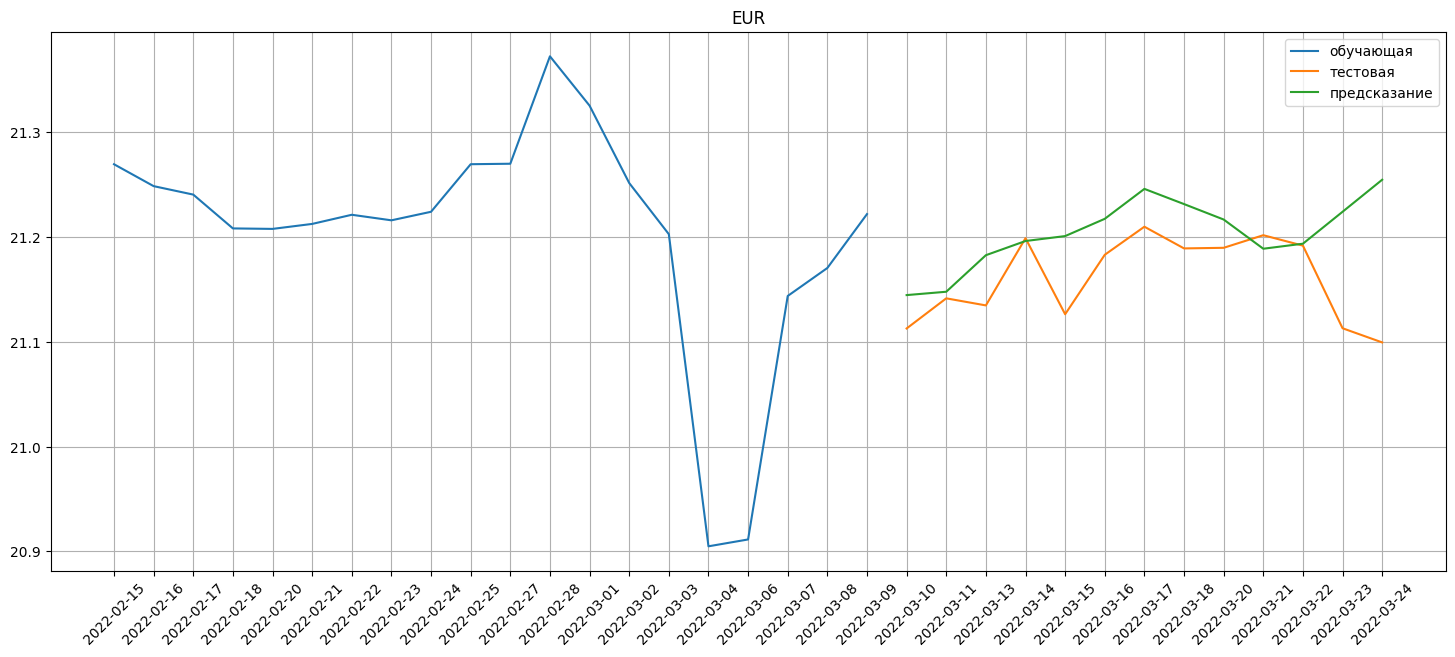


======================================== CZK ========================================
2023-11-13 03:59:49,040 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.9 MiB
2023-11-13 03:59:49,048 - ApiComposer - Initial pipeline was fitted in 11.3 sec.
2023-11-13 03:59:49,054 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-13 03:59:49,092 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 16 min. Set of candidate models: ['polyfit', 'ar', 'smoothing', 'glm', 'locf', 'ets', 'lagged', 'gaussian_filter', 'sparse_lagged', 'ts_naive_average', 'diff_filter', 'cut', 'polyfit', 'adareg', 'ar', 'pca', 'glm', 'locf', 'rfr', 'ts_naive_average', 'ets', 'gaussian_filter', 'normalization', 'ransac_lin_reg', 'scaling', 'lasso', 'smoothing', 'dtreg', 'sgdr', 'lagged', 'ridge', 'sparse_lagged', 'linear', 'diff_filter', 'cut', 'ransac_non_lin_reg'].
2023-11-1

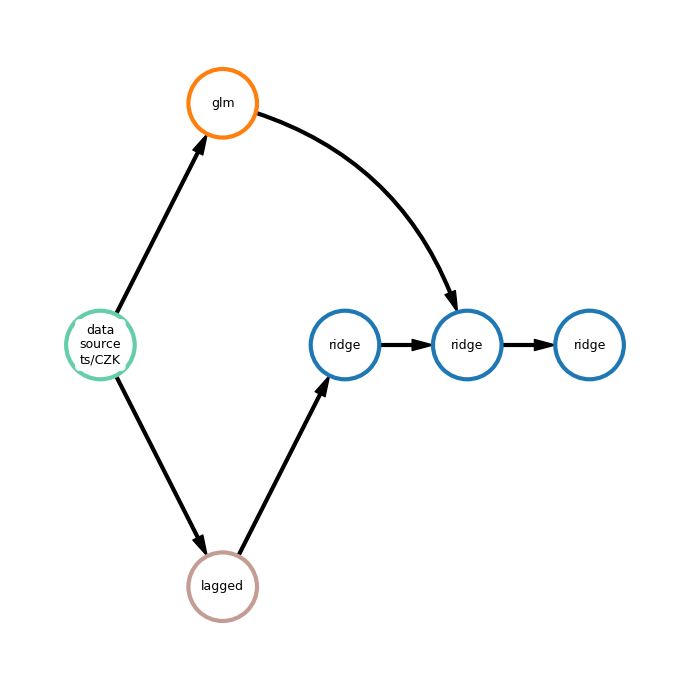

[0.84034939 0.84037415 0.84040392 0.84043776 0.84047064 0.84050512
 0.84053679 0.84056867 0.84059755 0.8406296  0.84066645 0.84070884
 0.8407527  0.84079783 0.84085057 0.84090629 0.84095981]
{'mae': 0.006, 'mape': 0.007}


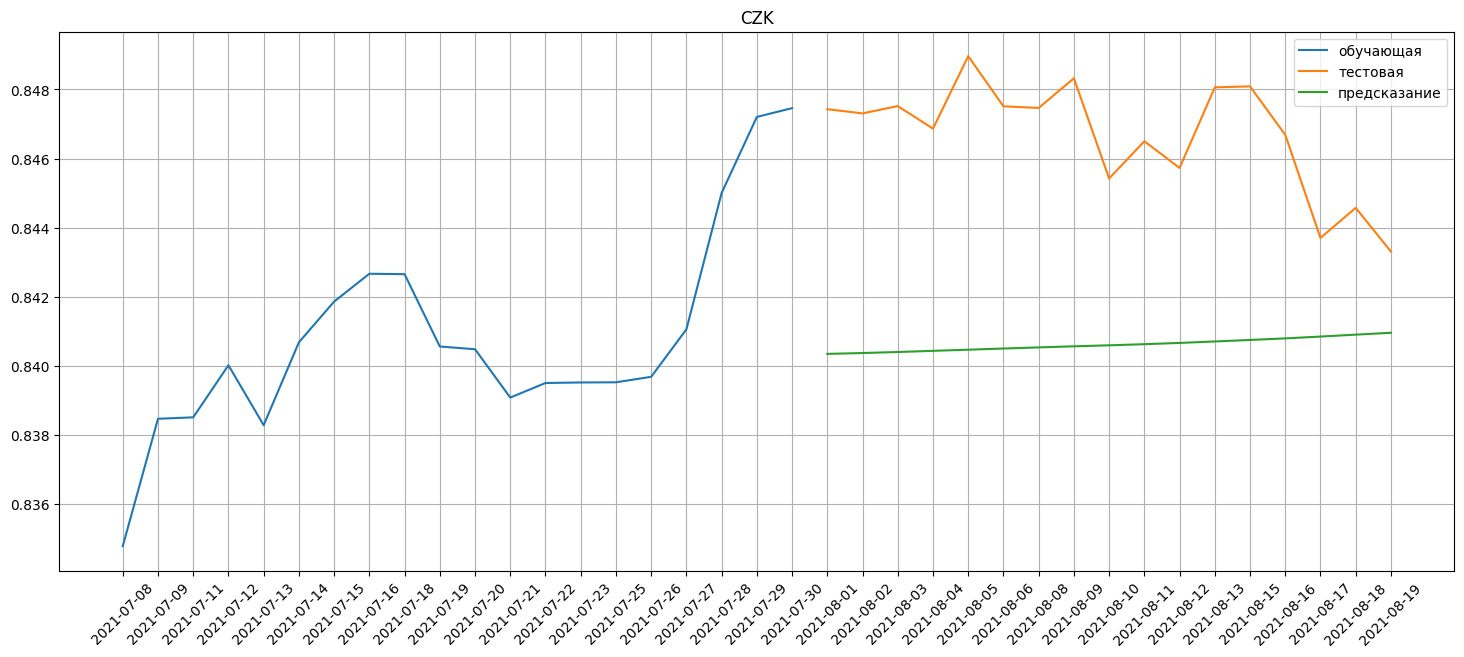


======================================== PKR ========================================
2023-11-13 04:16:23,900 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.4 MiB
2023-11-13 04:16:23,904 - ApiComposer - Initial pipeline was fitted in 9.4 sec.
2023-11-13 04:16:23,907 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-13 04:16:23,933 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 28 min. Set of candidate models: ['polyfit', 'stl_arima', 'smoothing', 'ar', 'glm', 'locf', 'arima', 'clstm', 'ets', 'lagged', 'gaussian_filter', 'sparse_lagged', 'ts_naive_average', 'diff_filter', 'cut', 'polyfit', 'adareg', 'ar', 'pca', 'glm', 'locf', 'normalization', 'ransac_lin_reg', 'exog_ts', 'fast_ica', 'smoothing', 'ridge', 'sparse_lagged', 'linear', 'ts_naive_average', 'lasso', 'cut', 'ransac_non_lin_reg', 'lgbmreg', 'stl_arima', 'arima', 'rfr', '

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-13 04:33:14,632 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [16:50<?, ?gen/s]

2023-11-13 04:33:14,654 - ApiComposer - Hyperparameters tuning started with 11 min. timeout
2023-11-13 04:33:14,795 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [dtreg, glm, data_source_ts/PKR]}
dtreg - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/PKR - {} 
Initial metric: 0.000
  0%|          | 0/100000 [00:00<?, ?trial/s, best loss=?]

  1%|          | 1113/100000 [10:59<16:16:45,  1.69trial/s, best loss: 0.0003077846634734728]
2023-11-13 04:44:14,599 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [dtreg, glm, data_source_ts/PKR]}
dtreg - {'max_depth': 9, 'min_samples_leaf': 12, 'min_samples_split': 14}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
data_source_ts/PKR - {}
2023-11-13 04:44:14,603 - PipelineTuner - Final metric: 0.000
2023-11-13 04:44:14,648 - ApiComposer - Hyperparameters tuning finished
2023-11-13 04:44:15,294 - ApiComposer - Model generation finished
2023-11-13 04:44:15,423 - FEDOT logger - Final pipeline was fitted
2023-11-13 04:44:15,428 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [dtreg, glm, data_source_ts/PKR]}
dtreg - {'max_depth': 9, 'min_samples_leaf': 12, 'min_samples_split': 14}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
data_source_ts/PKR - {}
Memory consumption for finish in main session: current 1.9 MiB, max: 54.0 MiB


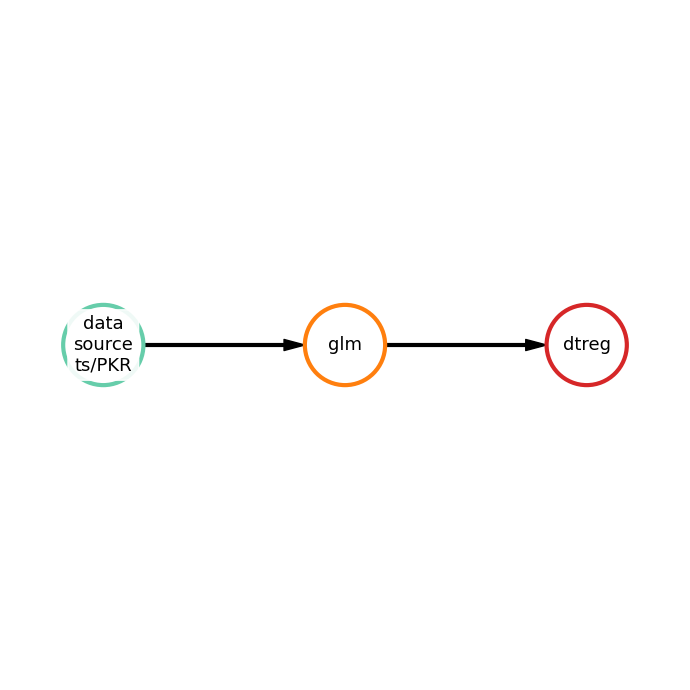

[0.11101778 0.11099367 0.11100648 0.11103466 0.1110768  0.11111044
 0.11114352]
{'mae': 0.0, 'mape': 0.001}


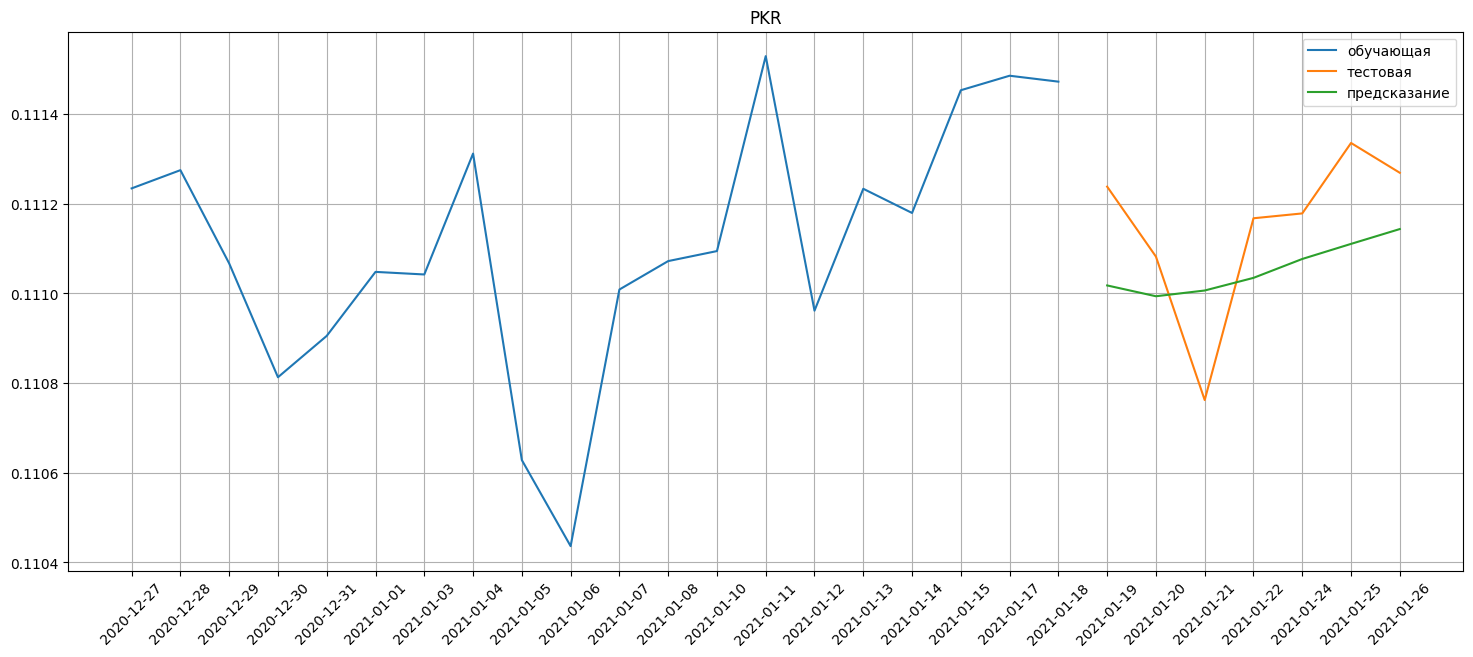


======================================== MXN ========================================
2023-11-13 04:44:26,802 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.0 MiB
2023-11-13 04:44:26,809 - ApiComposer - Initial pipeline was fitted in 8.9 sec.
2023-11-13 04:44:26,813 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-13 04:44:26,848 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 31 min. Set of candidate models: ['polyfit', 'stl_arima', 'smoothing', 'ar', 'glm', 'locf', 'arima', 'clstm', 'ets', 'lagged', 'gaussian_filter', 'sparse_lagged', 'ts_naive_average', 'diff_filter', 'cut', 'polyfit', 'adareg', 'ar', 'pca', 'glm', 'locf', 'normalization', 'ransac_lin_reg', 'exog_ts', 'fast_ica', 'smoothing', 'ridge', 'sparse_lagged', 'linear', 'ts_naive_average', 'lasso', 'cut', 'ransac_non_lin_reg', 'lgbmreg', 'stl_arima', 'arima', 'rfr', '

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-13 07:22:57,730 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [2:38:30<?, ?gen/s]

2023-11-13 07:22:57,767 - ApiComposer - Time for pipeline composing was 2:38:30.899814.
The remaining 127.7 seconds are not enough to tune the hyperparameters.
2023-11-13 07:22:57,771 - ApiComposer - Composed pipeline returned without tuning.


2023-11-13 07:22:58,377 - ApiComposer - Model generation finished
2023-11-13 07:23:07,350 - FEDOT logger - Final pipeline was fitted
2023-11-13 07:23:07,357 - FEDOT logger - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/MXN, ridge, lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'log'}
data_source_ts/MXN - {}
ridge - {'alpha': 4.900885889764172}
lagged - {'window_size': 10}
Memory consumption for finish in main session: current 1.2 MiB, max: 12.0 MiB


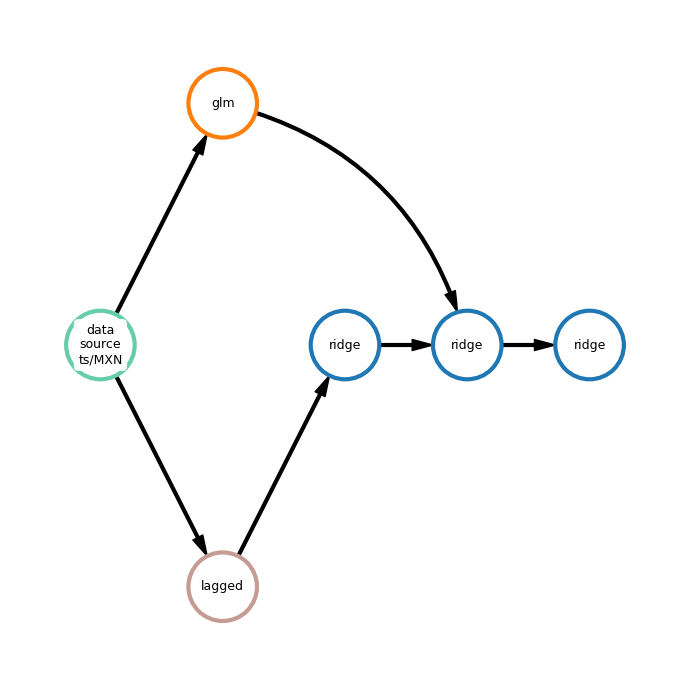

[0.89096134 0.89094429 0.89092492 0.8909062  0.89089002 0.89087612
 0.89086806 0.89086474 0.89086208 0.89085732 0.89084978 0.89083972]
{'mae': 0.003, 'mape': 0.004}


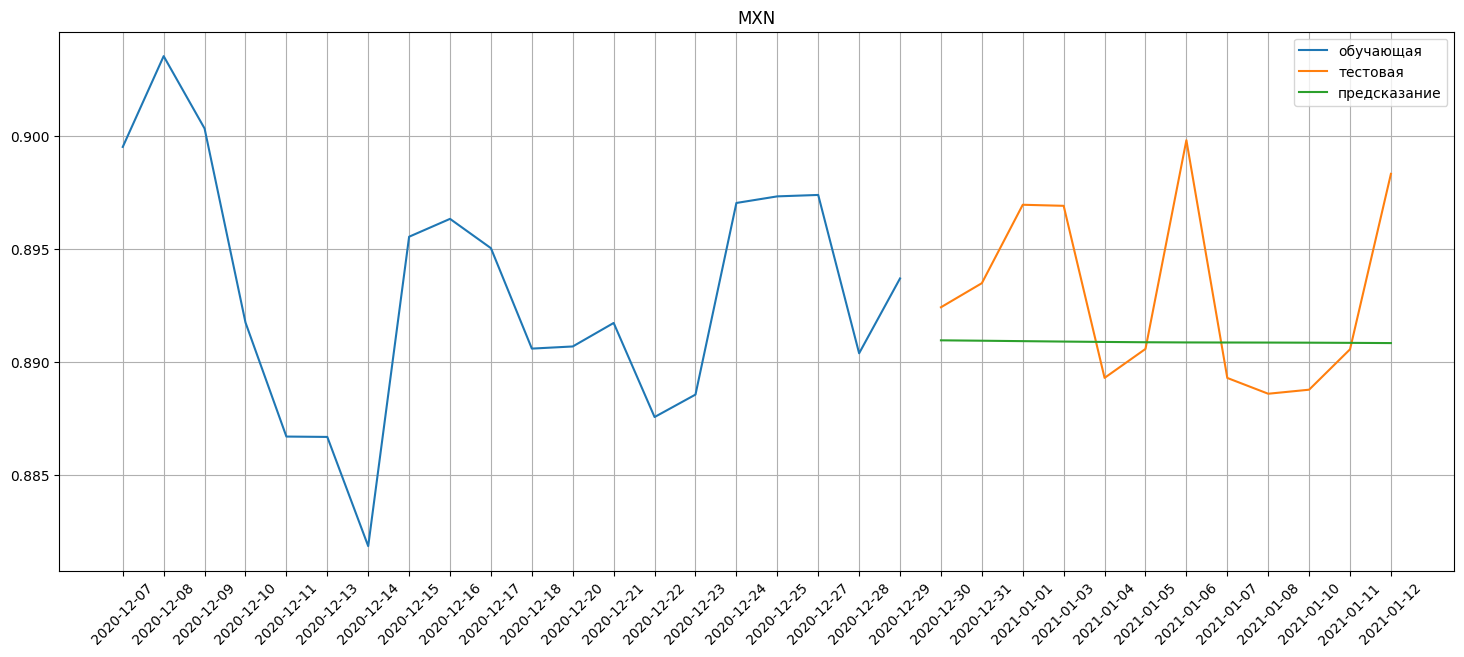


======================================== ZAR ========================================
2023-11-13 07:23:18,370 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 1.7 MiB
2023-11-13 07:23:18,375 - ApiComposer - Initial pipeline was fitted in 8.5 sec.
2023-11-13 07:23:18,379 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-13 07:23:18,403 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 19 min. Set of candidate models: ['polyfit', 'stl_arima', 'smoothing', 'ar', 'glm', 'locf', 'arima', 'clstm', 'ets', 'lagged', 'gaussian_filter', 'sparse_lagged', 'ts_naive_average', 'diff_filter', 'cut', 'polyfit', 'adareg', 'ar', 'pca', 'glm', 'locf', 'normalization', 'ransac_lin_reg', 'exog_ts', 'fast_ica', 'smoothing', 'ridge', 'sparse_lagged', 'linear', 'ts_naive_average', 'lasso', 'cut', 'ransac_non_lin_reg', 'lgbmreg', 'stl_arima', 'arima', 'rfr', '

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-13 07:34:48,420 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [11:29<?, ?gen/s]

2023-11-13 07:34:48,446 - ApiComposer - Hyperparameters tuning started with 7 min. timeout


2023-11-13 07:34:54,259 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/ZAR, ridge, lagged]}
ridge - {'alpha': 4.739907585454468}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/ZAR - {}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 0.005
  0%|          | 50/100000 [06:10<257:23:13,  9.27s/trial, best loss: 0.0047910798844017916]
2023-11-13 07:42:18,624 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/ZAR, ridge, lagged]}
ridge - {'alpha': 4.739907585454468}
ridge - {'alpha': 2.959921934540855}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/ZAR - {}
ridge - {'alpha': 2.3016757571775863}
lagged - {'window_size': 10}
2023-11-13 07:42:18,630 - PipelineTuner - Final metric: 0.005
2023-11-13 07:42:18,638 - ApiComposer - Hyperparameters tuning finished
2023-11-13 07:42:19,242 - ApiComposer - Model generation finished
2023-11-1

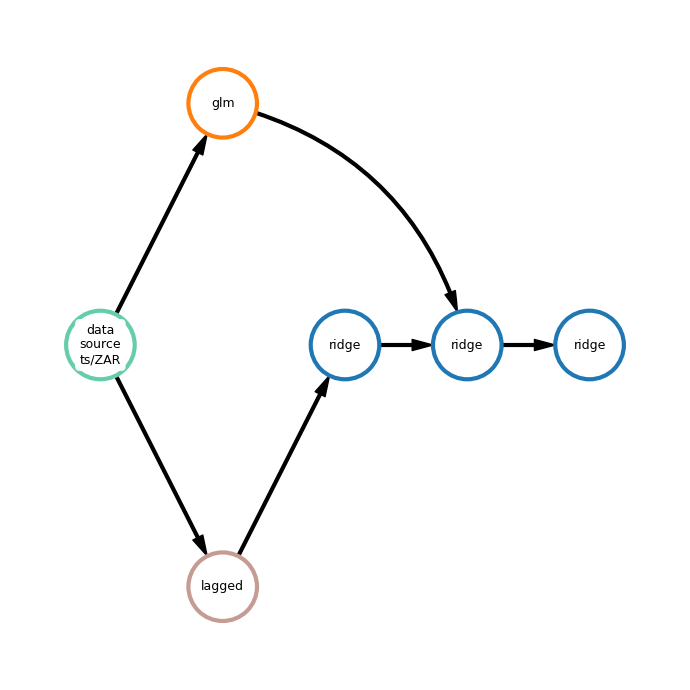

[1.13070399 1.13109929]
{'mae': 0.024, 'mape': 0.022}


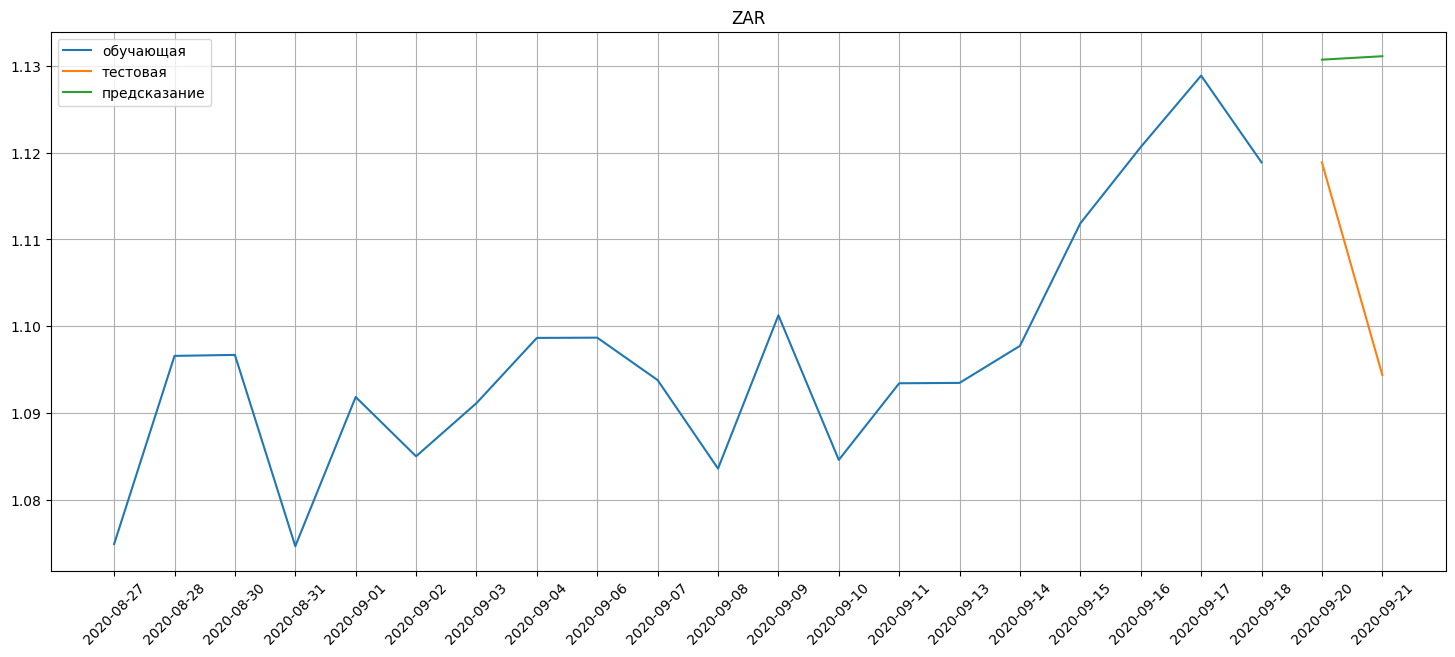


======================================== CHF ========================================
2023-11-13 07:42:39,801 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.3 MiB
2023-11-13 07:42:39,806 - ApiComposer - Initial pipeline was fitted in 8.8 sec.
2023-11-13 07:42:39,810 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-13 07:42:39,835 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 11 min. Set of candidate models: ['polyfit', 'ar', 'smoothing', 'glm', 'locf', 'ets', 'lagged', 'gaussian_filter', 'sparse_lagged', 'ts_naive_average', 'diff_filter', 'cut', 'polyfit', 'adareg', 'ar', 'pca', 'glm', 'locf', 'rfr', 'ts_naive_average', 'ets', 'gaussian_filter', 'normalization', 'ransac_lin_reg', 'scaling', 'lasso', 'smoothing', 'dtreg', 'sgdr', 'lagged', 'ridge', 'sparse_lagged', 'linear', 'diff_filter', 'cut', 'ransac_non_lin_reg'].
2023-11-13

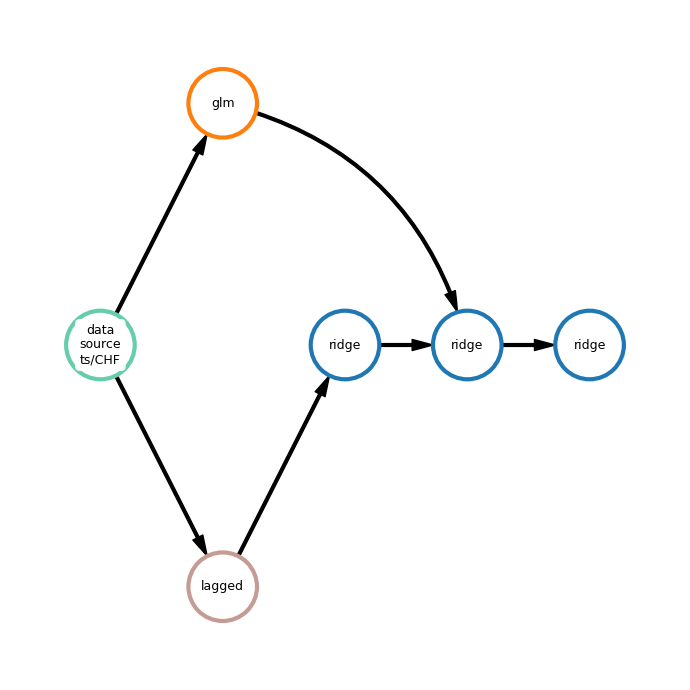

[20.08761433 20.0888932  20.09054352 20.09203345 20.09409426 20.0965814
 20.09862095]
{'mae': 0.016, 'mape': 0.001}


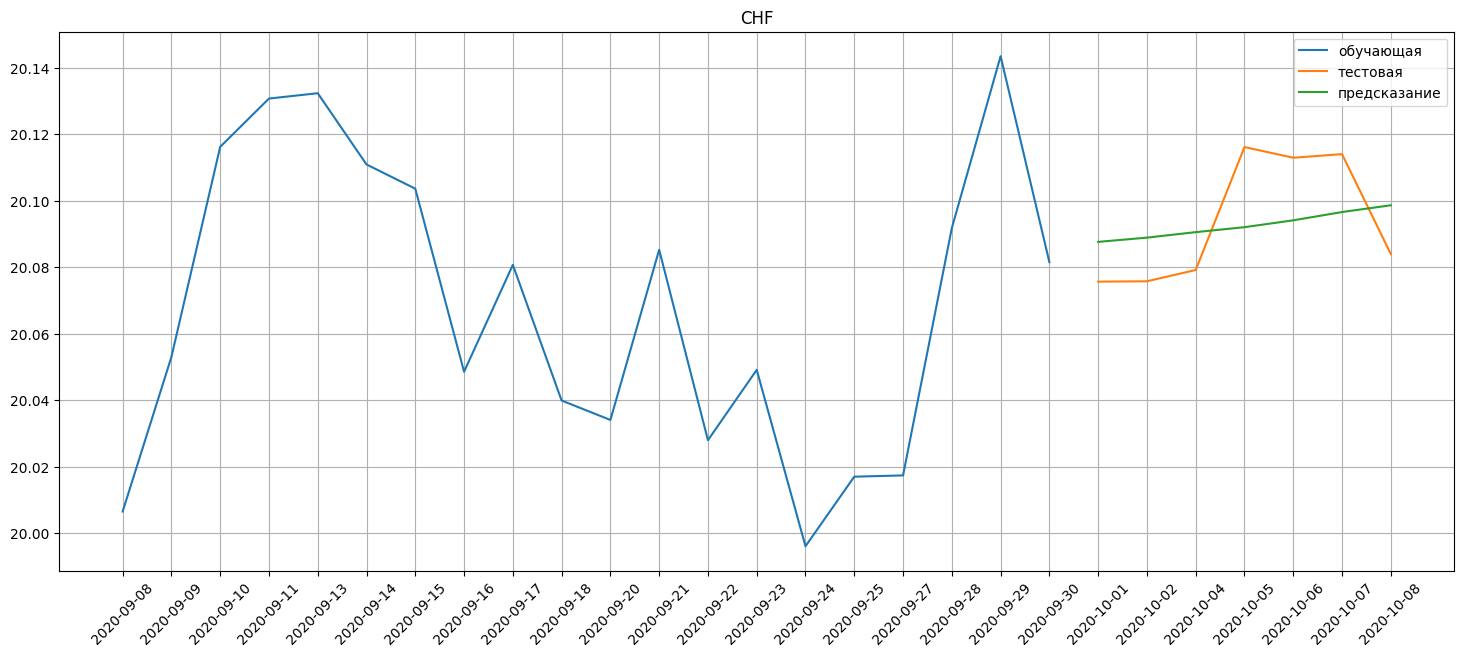


======================================== INR ========================================
2023-11-13 07:54:10,475 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.1 MiB
2023-11-13 07:54:10,480 - ApiComposer - Initial pipeline was fitted in 17.4 sec.
2023-11-13 07:54:10,485 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-13 07:54:10,508 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 29 min. Set of candidate models: ['polyfit', 'stl_arima', 'smoothing', 'ar', 'glm', 'locf', 'arima', 'clstm', 'ets', 'lagged', 'gaussian_filter', 'sparse_lagged', 'ts_naive_average', 'diff_filter', 'cut', 'polyfit', 'adareg', 'ar', 'pca', 'glm', 'locf', 'normalization', 'ransac_lin_reg', 'exog_ts', 'fast_ica', 'smoothing', 'ridge', 'sparse_lagged', 'linear', 'ts_naive_average', 'lasso', 'cut', 'ransac_non_lin_reg', 'lgbmreg', 'stl_arima', 'arima', 'rfr', 

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-13 08:11:53,250 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [17:42<?, ?gen/s]

2023-11-13 08:11:53,291 - ApiComposer - Hyperparameters tuning started with 11 min. timeout


2023-11-13 08:12:34,833 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [svr, sgdr, ridge, glm, data_source_ts/INR, ridge, lagged, linear, decompose]}
svr - {}
sgdr - {}
ridge - {'alpha': 5.6568361614447245}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/INR - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.000
  0%|          | 14/100000 [03:14<1349:52:38, 48.60s/trial, best loss: 0.02011793853749667]
2023-11-13 08:23:58,472 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [svr, sgdr, ridge, glm, data_source_ts/INR, ridge, lagged, linear, decompose]}
svr - {}
sgdr - {}
ridge - {'alpha': 5.6568361614447245}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/INR - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-11-13 08:23:58,475 - PipelineTuner - Final metric: 0.000
2023-11-13 08:23:58,482 - ApiComposer - Hyperparameters tuning finished
2023-11-13 

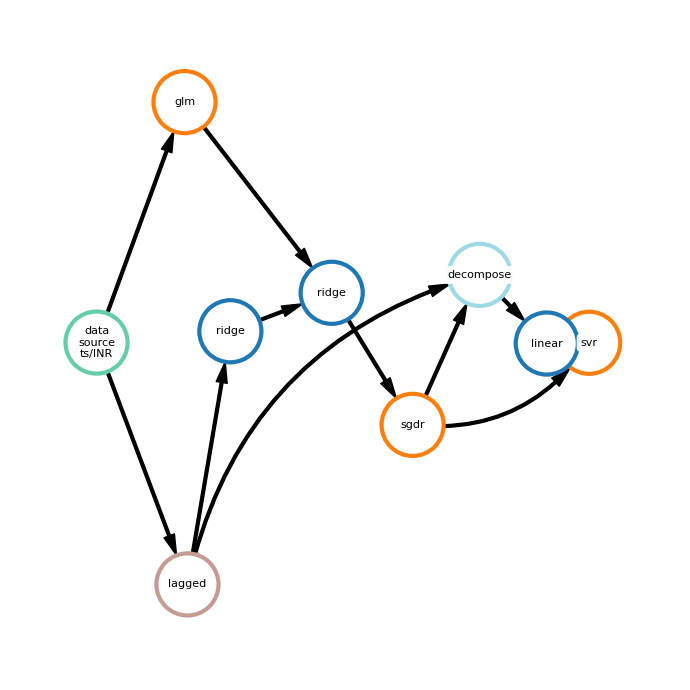

[0.24957336 0.24909556]
{'mae': 0.0, 'mape': 0.001}


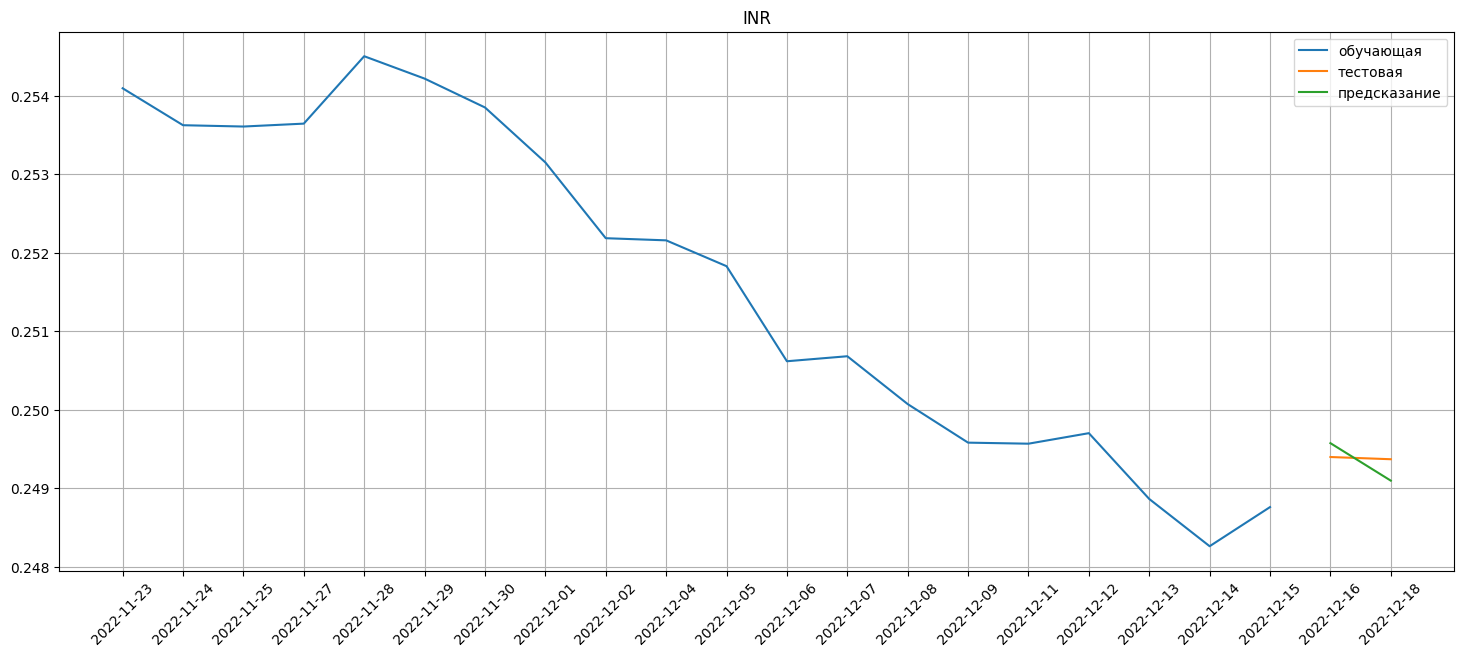


======================================== AED ========================================
2023-11-13 08:25:11,097 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.3 MiB
2023-11-13 08:25:11,101 - ApiComposer - Initial pipeline was fitted in 18.4 sec.
2023-11-13 08:25:11,104 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-13 08:25:11,126 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 14 min. Set of candidate models: ['polyfit', 'ar', 'smoothing', 'glm', 'locf', 'ets', 'lagged', 'gaussian_filter', 'sparse_lagged', 'ts_naive_average', 'diff_filter', 'cut', 'polyfit', 'adareg', 'ar', 'pca', 'glm', 'locf', 'rfr', 'ts_naive_average', 'ets', 'gaussian_filter', 'normalization', 'ransac_lin_reg', 'scaling', 'lasso', 'smoothing', 'dtreg', 'sgdr', 'lagged', 'ridge', 'sparse_lagged', 'linear', 'diff_filter', 'cut', 'ransac_non_lin_reg'].
2023-11-1

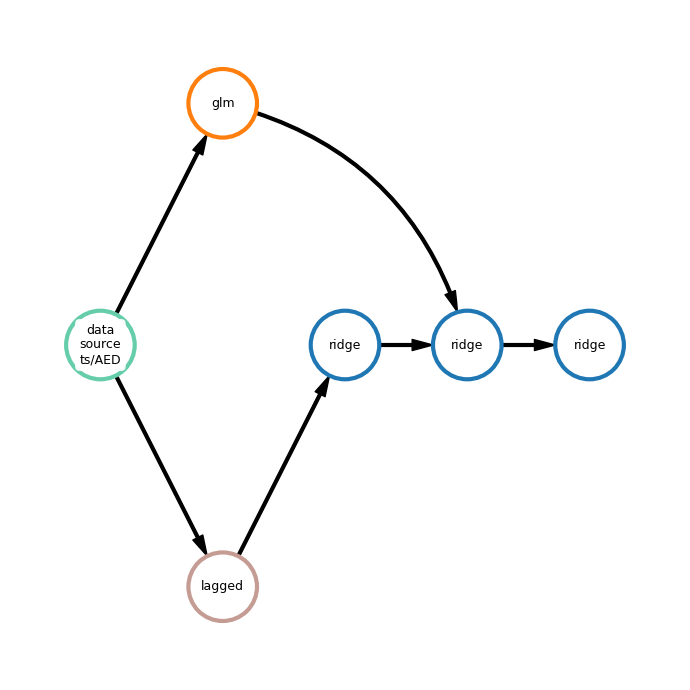

[5.64426347 5.64480392 5.64534614 5.64586425 5.64635359 5.64690128
 5.64743613 5.64799419 5.64851572]
{'mae': 0.028, 'mape': 0.005}


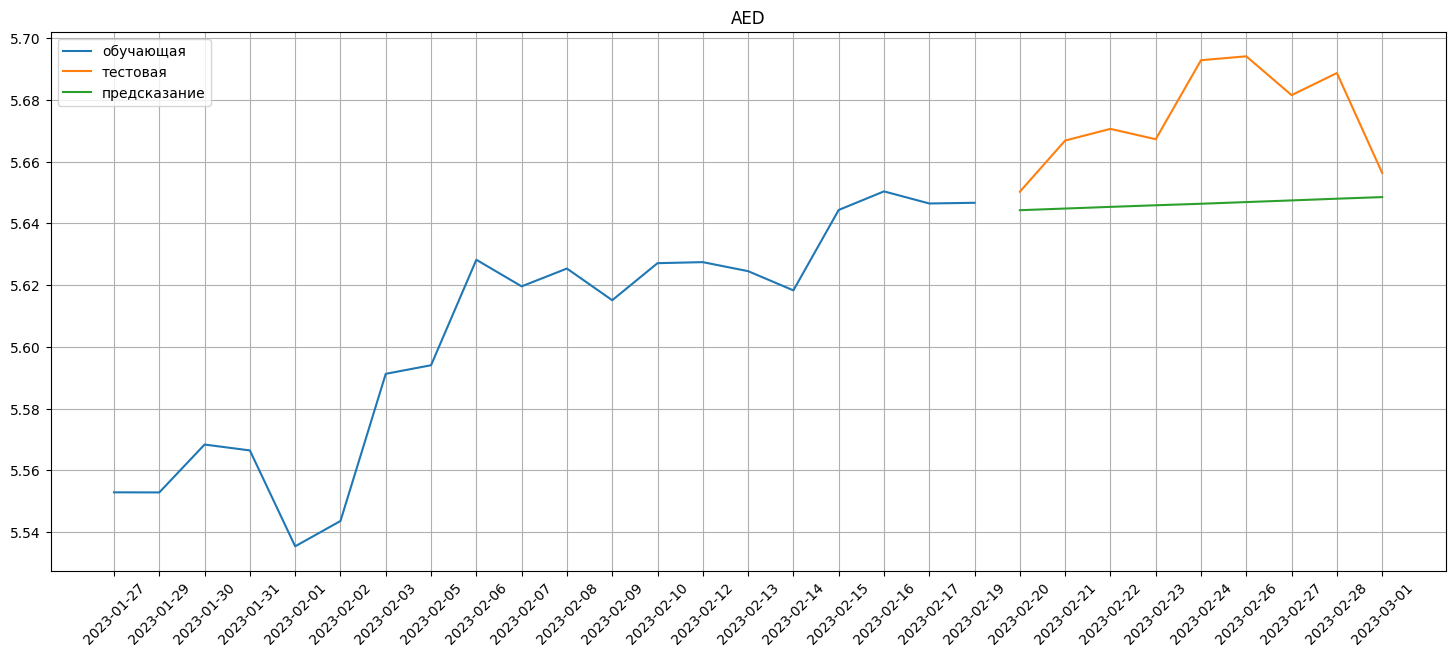


======================================== VND ========================================
2023-11-13 08:40:00,528 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.5 MiB
2023-11-13 08:40:00,533 - ApiComposer - Initial pipeline was fitted in 21.2 sec.
2023-11-13 08:40:00,537 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-13 08:40:00,562 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 49 min. Set of candidate models: ['polyfit', 'stl_arima', 'smoothing', 'ar', 'glm', 'locf', 'arima', 'clstm', 'ets', 'lagged', 'gaussian_filter', 'sparse_lagged', 'ts_naive_average', 'diff_filter', 'cut', 'polyfit', 'adareg', 'ar', 'pca', 'glm', 'locf', 'normalization', 'ransac_lin_reg', 'exog_ts', 'fast_ica', 'smoothing', 'ridge', 'sparse_lagged', 'linear', 'ts_naive_average', 'lasso', 'cut', 'ransac_non_lin_reg', 'lgbmreg', 'stl_arima', 'arima', 'rfr', 

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-13 09:05:30,396 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [25:29<?, ?gen/s]

2023-11-13 09:05:30,437 - ApiComposer - Hyperparameters tuning started with 23 min. timeout


2023-11-13 09:05:48,698 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 5, 'nodes': [rfr, treg, glm, data_source_ts/VND, lagged]}
rfr - {'n_jobs': -1}
treg - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/VND - {}
lagged - {'window_size': 10} 
Initial metric: 0.000
  0%|          | 62/100000 [19:52<636:29:04, 22.93s/trial, best loss: 1.4797376169179767e-06]
2023-11-13 09:29:09,921 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 5, 'nodes': [rfr, treg, glm, data_source_ts/VND, lagged]}
rfr - {'n_jobs': -1, 'bootstrap': False, 'max_features': 0.9216037761616955, 'min_samples_leaf': 11, 'min_samples_split': 9}
treg - {'bootstrap': False, 'max_features': 0.5846207798582442, 'min_samples_leaf': 18, 'min_samples_split': 6}
glm - {'family': 'gamma', 'link': 'log'}
data_source_ts/VND - {}
lagged - {'window_size': 10}
2023-11-13 09:29:09,925 - PipelineTuner - Final metric: 0.000
2023-11-13 09:29:09,933 - ApiComposer - Hyperparameters tuning finished
2023-

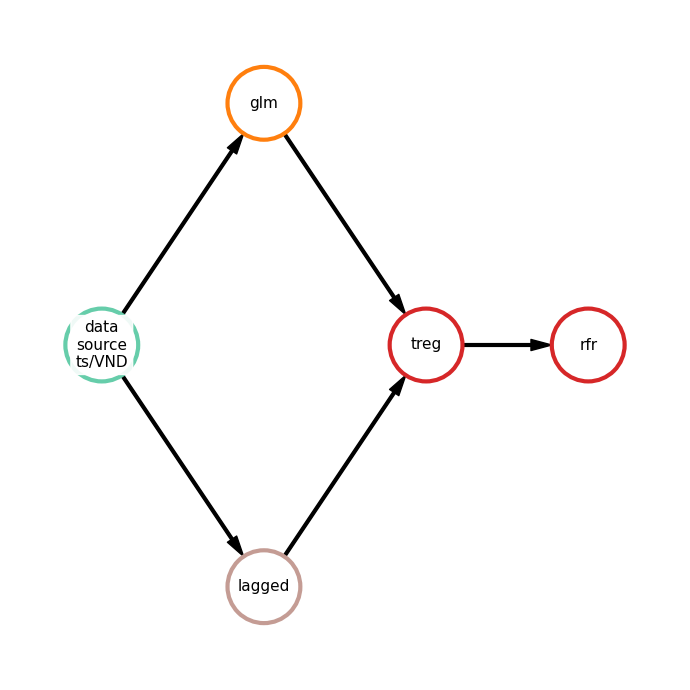

[0.0008905  0.00089037 0.00089185 0.00089254]
{'mae': 0.0, 'mape': 0.002}


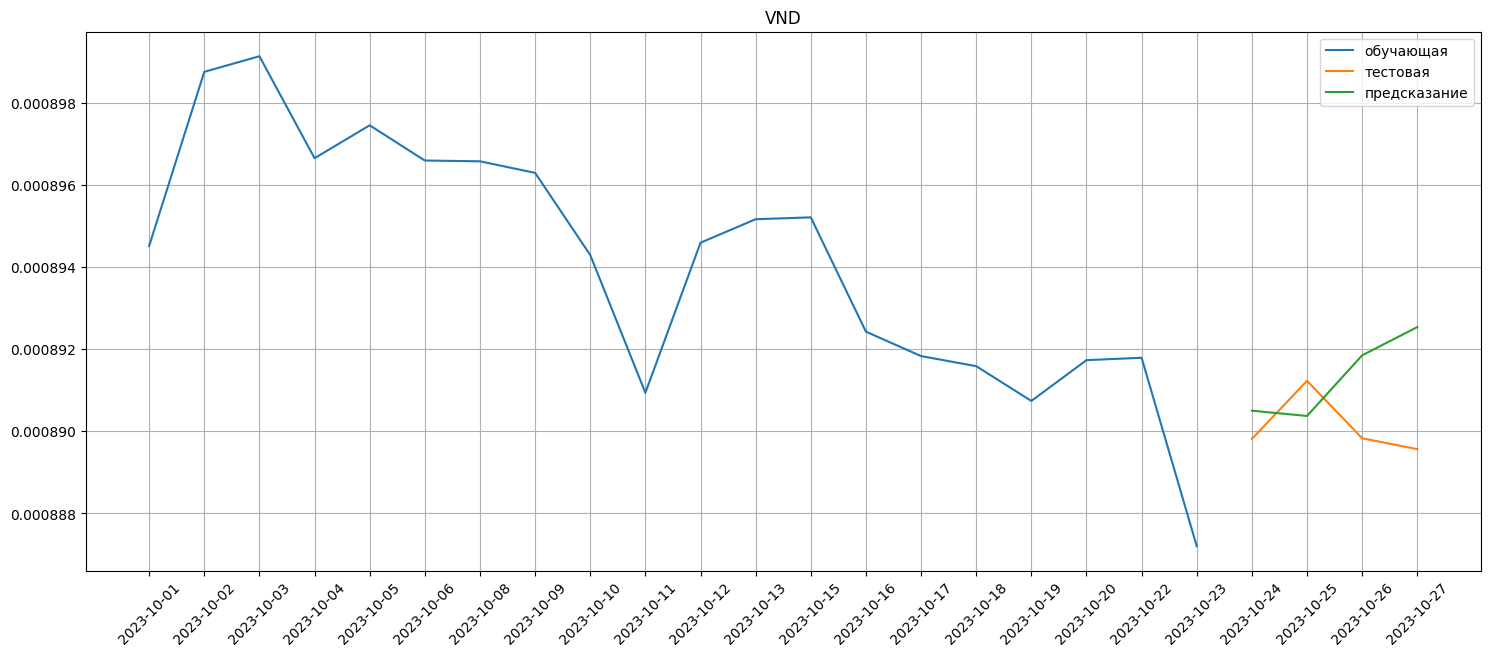

In [7]:
start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 6*60*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    forecast_length = random.randint(2,20)
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = random.randint(1,60)
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=timeout)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item['plot_file'] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)

# Аналитика

In [8]:
rep = pd.DataFrame()
rep['time'] = list(item['time'] for item in history)
rep['target_name'] = list(item['target_name'] for item in history)
rep['forecast_length'] = list(item['forecast_length'] for item in history)
rep['delta'] = list(item['delta'] for item in history)
rep['timeout'] = list(item['timeout'] for item in history)
rep['mape'] = list(item['metrics']['mape'] for item in history)
rep

,time,target_name,forecast_length,delta,timeout,mape
0,"(2023, 11, 5, 18, 12, 27, 6, 309, 0)",AED,10,942,1,0.004
1,"(2023, 11, 5, 18, 16, 20, 6, 309, 0)",ZAR,10,583,1,0.011
2,"(2023, 11, 5, 18, 17, 52, 6, 309, 0)",MYR,10,216,1,0.010
3,"(2023, 11, 5, 18, 19, 45, 6, 309, 0)",QAR,10,307,1,0.011
4,"(2023, 11, 5, 18, 21, 29, 6, 309, 0)",COP,10,633,1,0.106
...,...,...,...,...,...,...
115,"(2023, 11, 13, 7, 23, 9, 0, 317, 0)",ZAR,2,983,19,0.022
116,"(2023, 11, 13, 7, 42, 28, 0, 317, 0)",CHF,7,968,11,0.001
117,"(2023, 11, 13, 7, 53, 52, 0, 317, 0)",INR,2,282,29,0.001
118,"(2023, 11, 13, 8, 24, 51, 0, 317, 0)",AED,9,219,14,0.005


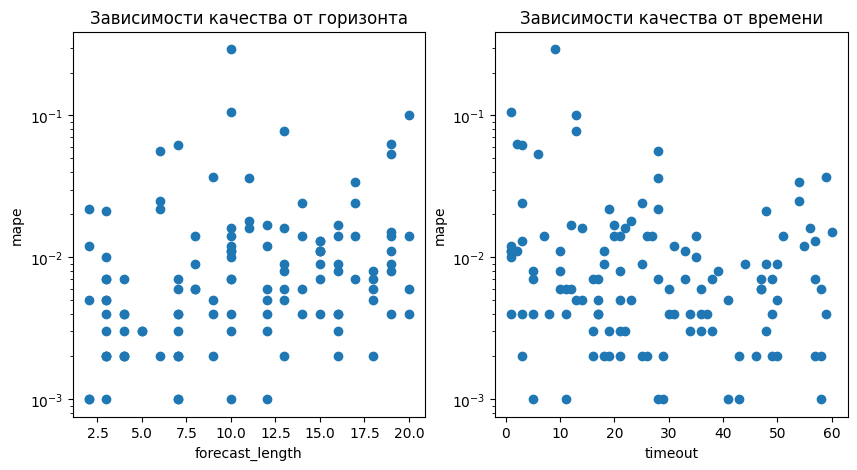

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(rep['forecast_length'],rep['mape'])
ax[0].semilogy()
ax[0].set_xlabel('forecast_length')
ax[0].set_ylabel('mape')
ax[0].set_title('Зависимости качества от горизонта')

ax[1].scatter(rep['timeout'],rep['mape'])
ax[1].semilogy()
ax[1].set_xlabel('timeout')
ax[1].set_ylabel('mape')
ax[1].set_title('Зависимости качества от времени')

plt.show()